### Introduction

In a one-click shopping world with on-demand everything, the Life insurance application process is antiquated.

Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

The result? People are turned off.

This Life Insurance company wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### Problem Statement:
Develop a prediction model that accurately classify the Risk Level of a Life Insurance application

In [92]:
# Importing Libraries

# Importing Mathematical Library
import numpy as np
#Importing Data Manipulation Library
import pandas as pd

# Importing Visualization Libraries
import matplotlib.pyplot as plt # Basic Visualization Library
import seaborn as sns # Statistical Visualization Library

# Importing Machine Learning Libraries
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable

from imblearn.over_sampling import SMOTE

In [2]:
# Reading the Data File
data = pd.read_csv('DATA.csv')

In [3]:
# Viewing the first five rows of the Dataset
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
# Understanding the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [5]:
# Understanding information of all the Columns in the Dataset
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
Id                     int64
Product_Info_1         int64
Product_Info_2         object
Product_Info_3         int64
Product_Info_4         float64
Product_Info_5         int64
Product_Info_6         int64
Product_Info_7         int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2      int64
Employment_Info_3      int64
Employment_Info_4      float64
Employment_Info_5      int64
Employment_Info_6      float64
InsuredInfo_1          int64
InsuredInfo_2          int64
InsuredInfo_3          int64
InsuredInfo_4          int64
InsuredInfo_5          int64
InsuredInfo_6          int64
InsuredInfo_7          int64
Insurance_History_1    int64
Insurance_History_2    int64
Insurance_History_3    int64
Insurance_History_4    int64
Insurance_History_5    float64
I

#### Observations about the Data:
1. Size of the Dataset : 59381 x 128
2. No. of Rows : 59381
3. No. of Columns : 128
4. Data Types :
            4(a) float64 = 18 Columns
            4(b) int64 = 109
            4(c) object = 1
5. Target Variable = 'Response'

### Checking of Missing Values:

In [14]:
def null_function():
    null_values = pd.DataFrame((data.isnull().sum()/len(data.index)*100),columns=['Percent_Null'])
    only_missing_variables = null_values[null_values['Percent_Null'] !=0 ]
    return pd.DataFrame(only_missing_variables.sort_values(by='Percent_Null', ascending=False))

In [17]:
pd.DataFrame(null_function())

,Percent_Null
Medical_History_10,99.061990
Medical_History_32,98.135767
Medical_History_24,93.598963
Medical_History_15,75.101463
Family_Hist_5,70.411411
Family_Hist_3,57.663226
Family_Hist_2,48.257860
Insurance_History_5,42.767889
Family_Hist_4,32.306630
Employment_Info_6,18.278574


In [32]:
# Finding the Total No. of Null Values in each Column:
pd.DataFrame(data.isnull().sum())[pd.DataFrame(data.isnull().sum())[0] != 0].sort_values(by=0, ascending=False).rename(columns={0:'Total No. of Null Values'})

,Total No. of Null Values
Medical_History_10,58824
Medical_History_32,58274
Medical_History_24,55580
Medical_History_15,44596
Family_Hist_5,41811
Family_Hist_3,34241
Family_Hist_2,28656
Insurance_History_5,25396
Family_Hist_4,19184
Employment_Info_6,10854


### Dealing with Missing Values:

Dropping the columns which are having more the 30% of Missing Values

Columns which are having more than 30% of missing values are:
    1. Medical_History_10 = 99.061990
    2. Medical_History_32 = 98.135767
    3. Medical_History_24 = 93.598963
    4. Medical_History_15 = 75.101463
    5. Family_Hist_5 = 70.411411
    6. Family_Hist_3 = 57.663226
    7. Family_Hist_2 = 48.257860
    8. Insurance_History_5 = 42.767889
    9. Family_Hist_4 = 32.306630

In [39]:
# Displaying the Columns with null values more than 30%
null_values = pd.DataFrame((data.isnull().sum()/len(data.index)*100),columns=['Percent_Null'])
only_missing_variables = null_values[(null_values['Percent_Null'] !=0) & (null_values['Percent_Null'] >=30)]
pd.DataFrame(only_missing_variables.sort_values(by='Percent_Null', ascending=False))

,Percent_Null
Medical_History_10,99.061990
Medical_History_32,98.135767
Medical_History_24,93.598963
Medical_History_15,75.101463
Family_Hist_5,70.411411
Family_Hist_3,57.663226
Family_Hist_2,48.257860
Insurance_History_5,42.767889
Family_Hist_4,32.306630


In [40]:
# Dropping the Columns:
data.drop(['Medical_History_10','Medical_History_32','Medical_History_24','Medical_History_15','Family_Hist_5','Family_Hist_3','Family_Hist_2','Insurance_History_5','Family_Hist_4'],axis=1,inplace=True)

### Missing Value Imputations:

Checking for the columns having Missing Values, after dropping the Columns which are having missing values more than 30%.

In [42]:
null_function()

,Percent_Null
Employment_Info_6,18.278574
Medical_History_1,14.969435
Employment_Info_4,11.416110
Employment_Info_1,0.031997


We are left with four columns that are having missing values more than 0% and less than 30%

<b>Dealing with 'Employment_Info_1' Column:</b>

In [45]:
np.dtype(data['Employment_Info_1'])

dtype('float64')

In [46]:
data['Employment_Info_1'].nunique()

1936

In [47]:
data['Employment_Info_1'].value_counts().sort_values()

0.082833       1
0.062416       1
0.099509       1
0.065100       1
0.011700       1
0.075550       1
0.012215       1
0.097894       1
0.040600       1
0.007150       1
0.072528       1
0.053600       1
0.432000       1
0.145935       1
0.047107       1
0.033720       1
0.040987       1
0.063847       1
0.129300       1
0.050016       1
0.034340       1
0.050323       1
0.021852       1
0.017364       1
0.028080       1
0.101428       1
0.035385       1
0.012709       1
0.076775       1
0.042119       1
            ... 
0.140000     422
0.024000     430
0.052000     457
0.015000     471
0.048000     481
0.130000     513
0.250000     523
0.036000     543
0.125000     580
0.110000     688
0.085000     816
0.200000     907
0.055000     980
0.020000     982
0.120000    1083
0.090000    1111
0.065000    1273
0.025000    1276
0.035000    1314
0.150000    1368
0.045000    1370
0.070000    1732
0.075000    1787
0.080000    1833
0.030000    1968
0.040000    2395
0.060000    2720
0.100000    30

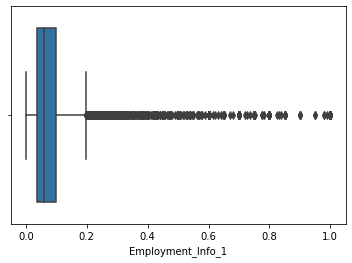

In [15]:
sns.boxplot(df['Employment_Info_1'])
# Note: distplot will not excute if there are nan in the data.

In [16]:
df['Employment_Info_1'].describe()

count    59362.000000
mean         0.077582
std          0.082347
min          0.000000
25%          0.035000
50%          0.060000
75%          0.100000
max          1.000000
Name: Employment_Info_1, dtype: float64

From the above information, we can infer that 'Employment_Info_1' Variable is continuous and right skewed, so for missing value imputation is done using median.

<b> Missing Value Imputation for 'Employment_Info_1' </b>

In [50]:
#Checking the median of 'Employment_Info_1':
data['Employment_Info_1'].median()

0.06

In [53]:
#Imputing missing values:
data['Employment_Info_1'] = data['Employment_Info_1'].fillna(data['Employment_Info_1'].median())

In [54]:
# Again Checking for Missing Values:
null_function()

,Percent_Null
Employment_Info_6,18.278574
Medical_History_1,14.969435
Employment_Info_4,11.416110


<b>Dealing with 'Employment_Info_6' Column:</b>

In [55]:
np.dtype(data['Employment_Info_6'])

dtype('float64')

In [56]:
data['Employment_Info_6'].nunique()

992

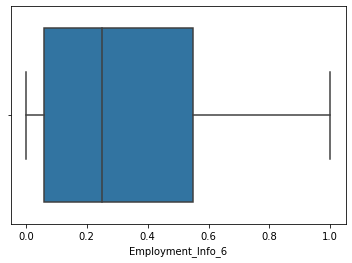

In [57]:
sns.boxplot(data['Employment_Info_6'])

In [59]:
data['Employment_Info_6'].describe()

count    59381.000000
mean         0.341094
std          0.318917
min          0.000000
25%          0.100000
50%          0.250000
75%          0.500000
max          1.000000
Name: Employment_Info_6, dtype: float64

From the above information, we can infer that 'Employment_Info_6' Variable is continuous and right skewed, so for missing value imputation is done using median.

<b> Missing Value Imputation for 'Employment_Info_6' </b>

In [58]:
data['Employment_Info_6'] = data['Employment_Info_6'].fillna(data['Employment_Info_6'].median())

In [60]:
# Again Checking for Missing Values if any:
null_function()

,Percent_Null
Medical_History_1,14.969435
Employment_Info_4,11.416110


<b>Dealing with 'Employment_Info_4' Column:</b>

In [61]:
np.dtype(data['Employment_Info_4'])

dtype('float64')

In [62]:
data['Employment_Info_4'].nunique()

871

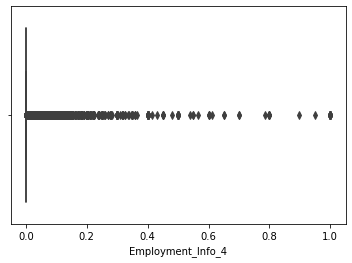

In [64]:
sns.boxplot(data['Employment_Info_4'])

In [67]:
data['Employment_Info_4'].median()

0.0

In [30]:
df['Employment_Info_4'].value_counts()

0.000000    44659
0.010000      418
0.020000      345
0.050000      338
0.030000      320
0.005000      308
0.001000      277
0.025000      228
0.015000      219
0.040000      216
0.012000      214
0.100000      188
0.060000      186
0.002000      173
0.024000      141
0.000500      124
0.000100      121
0.018000      108
0.006000      100
0.003000       95
0.036000       90
0.070000       89
0.080000       83
0.075000       82
0.035000       81
0.150000       77
0.045000       75
0.004000       65
0.048000       60
0.200000       58
            ...  
0.032900        1
0.008700        1
0.049285        1
0.000255        1
0.002640        1
0.004980        1
0.037392        1
0.019764        1
0.011190        1
0.035613        1
0.001561        1
0.024407        1
0.007968        1
0.011388        1
0.024585        1
0.007632        1
0.019600        1
0.003180        1
0.075480        1
0.000156        1
0.168000        1
0.111000        1
0.004400        1
0.022776        1
0.008040  

<b> Missing Value Imputation for 'Employment_Info_4' </b>

In [69]:
data['Employment_Info_4'] = data['Employment_Info_4'].fillna(data['Employment_Info_4'].median())

In [72]:
#Further checking for missing values if any:
null_function()

,Percent_Null
Medical_History_1,14.969435


<b>Dealing with 'Medical_History_1' Column:</b>

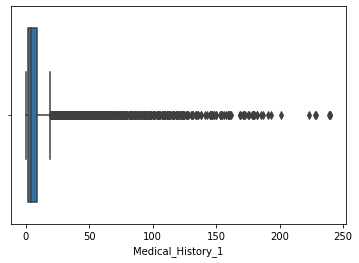

In [73]:
sns.boxplot(data['Medical_History_1'])

In [74]:
data['Medical_History_1'].describe()

count    50492.000000
mean         7.962172
std         13.027697
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        240.000000
Name: Medical_History_1, dtype: float64

In [75]:
data['Medical_History_1'].nunique()

171

In [77]:
data['Medical_History_1'].value_counts()

1.0      7657
2.0      5727
0.0      4789
3.0      4722
4.0      3668
5.0      3149
6.0      3017
7.0      2082
12.0     1738
8.0      1618
9.0      1480
10.0     1339
11.0     1183
13.0      863
14.0      715
15.0      583
16.0      499
18.0      452
17.0      442
24.0      355
19.0      313
22.0      279
21.0      276
23.0      267
20.0      266
27.0      198
25.0      186
26.0      165
28.0      139
30.0      132
         ... 
131.0       2
124.0       2
126.0       2
118.0       2
182.0       2
145.0       2
161.0       1
193.0       1
127.0       1
153.0       1
158.0       1
141.0       1
178.0       1
185.0       1
228.0       1
191.0       1
201.0       1
187.0       1
162.0       1
132.0       1
173.0       1
229.0       1
239.0       1
143.0       1
176.0       1
156.0       1
223.0       1
130.0       1
172.0       1
175.0       1
Name: Medical_History_1, Length: 171, dtype: int64

In [44]:
data['Medical_History_1'].mode()

0    1.0
dtype: float64

<b> Missing Value Imputation for 'Medical_History_1' </b>

In [80]:
data['Medical_History_1'] = data['Medical_History_1'].fillna(data['Medical_History_1'].mode()[0])

In [82]:
#Checking for Null Values:
null_function()

,Percent_Null


<b>From the above information, we can infer that there are no null values in the dataset.</b>

### Dropping unnecessary Columns from the Dataset:

Columns like 'Id' can be dropped which only a record identification number.

In [83]:
data = data.drop(['Id'],axis=1)

In [84]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


From the above table, we can see that there is 'Product_Info_2' Column which is still Categorical, and it has to be encoded.

Since it is Nominal Categorical Variable, it is splited with characters into one column and numbers into another and finally each column is encoded.

After encoding is done the original column 'Product_Info_2' is dropped.

<b> Working with 'Product_Info_2' </b>

In [85]:
data['Product_Info_2_char'] = data.Product_Info_2.str[0]
data['Product_Info_2_num'] = data.Product_Info_2.str[1]

In [86]:
data['Product_Info_2_char'] = pd.factorize(data['Product_Info_2_char'])[0]
data['Product_Info_2_num'] = pd.factorize(data['Product_Info_2_num'])[0]

In [87]:
# Dropping 'Product_Info_2' Column
data = data.drop('Product_Info_2',axis=1)

In [88]:
data.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_char,Product_Info_2_num
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,8,0,0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,4,1,1
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,8,2,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,8,0,2
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,8,0,3


### Finally the Data is Cleaned and ready for modelling.

In [90]:
#Checking the Shape of the Final Data:
data.shape

(59381, 119)

### Dividing the Independent Variables and Dependent Variable from the Dataset

In [91]:
X = data.drop('Response',axis=1)
y = data.Response

## Modelling:
1. Baseline Model
2. Base model without SMOTE Technique(with imbalanced data)
3. Modelling with Hyper-parameters and without SMOTE Technique(with imbalanced data)
4. Base model with SMOTE Technique(with balanced data)
5. Modelling with Hyper-parameters and with SMOTE Technique(with balanced data)

Classification Models used:
    1. Logistic Regression
    2. k Nearest Neighbors
    3. Decision Tree
    4. Random Forest

In [93]:
# Splitting the data into Train and Test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=2)

In [94]:
# Modelling and Evaluation for Base Model without SMOTE:


report= PrettyTable()
report.field_names=['Model name','Accuracy Score','Precision Score','Recall Score','F1_score','Cohen Kappa Score']


classifier=['LogisticRegression','KNN','DecisionTreeClassifier','RandomForestClassifier']
accuracy=[]
precision=[]
recall=[]
f1_score=[]
kappa=[]

for i in classifier:
    if i=='LogisticRegression':
        model1=LogisticRegression()
        model1.fit(X_train,y_train)
        log_pred=pd.DataFrame(model1.predict(X_test))
        #Evaluation metrics
        report.add_row([i,
                    metrics.accuracy_score(y_test,log_pred),
                    metrics.precision_score(y_test,log_pred,average='weighted'),
                    metrics.recall_score(y_test,log_pred,average='weighted'),
                    metrics.f1_score(y_test,log_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_test,log_pred)])
        
    elif i=='KNN': 
        model2=KNeighborsClassifier()
        model2.fit(X_train,y_train)
        knn_pred=model2.predict(X_test)
        #Evaluation metrics
        report.add_row([i,
                    metrics.accuracy_score(y_test,knn_pred),
                    metrics.precision_score(y_test,knn_pred,average='weighted'),
                    metrics.recall_score(y_test,knn_pred,average='weighted'),
                    metrics.f1_score(y_test,knn_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_test,log_pred)])
        
    elif i=='DecisionTreeClassifier':
        model3=DecisionTreeClassifier()
        model3.fit(X_train,y_train)
        dec_pred=model3.predict(X_test)
        #Evaluation metrics
        report.add_row([i,
                    metrics.accuracy_score(y_test,dec_pred),
                    metrics.precision_score(y_test,dec_pred,average='weighted'),
                    metrics.recall_score(y_test,dec_pred,average='weighted'),
                    metrics.f1_score(y_test,dec_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_test,log_pred)])
        
    elif i=='RandomForestClassifier':
        model4=RandomForestClassifier()
        model4.fit(X_train,y_train)
        random_pred=model4.predict(X_test)
        #Evaluation metrics
        report.add_row([i,
                    metrics.accuracy_score(y_test,random_pred),
                    metrics.precision_score(y_test,random_pred,average='weighted'),
                    metrics.recall_score(y_test,random_pred,average='weighted'),
                    metrics.f1_score(y_test,random_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_test,log_pred)])
print(report)


C:\Users\Sree Charan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sree Charan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Sree Charan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


+------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|       Model name       |    Accuracy Score   |   Precision Score   |     Recall Score    |       F1_score      |  Cohen Kappa Score  |
+------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|   LogisticRegression   |  0.4784170642716812 | 0.44527062032487086 |  0.4784170642716812 | 0.43506289938093284 | 0.31533925432715126 |
|          KNN           |  0.3023294976143699 |  0.2671781804187402 |  0.3023294976143699 | 0.27925532559801497 | 0.31533925432715126 |
| DecisionTreeClassifier | 0.40157170923379176 |  0.4025837099867676 | 0.40157170923379176 | 0.40199902889835876 | 0.31533925432715126 |
| RandomForestClassifier |  0.4755543081672748 | 0.44833908828777996 |  0.4755543081672748 |  0.4564124611431431 | 0.31533925432715126 |
+------------------------+---------------

In [95]:
## Code to find the best hyper parameters for the KNN and DecisionTree and Random forest

from sklearn.model_selection import RandomizedSearchCV
## code to find the best model for the dataset


best_par= PrettyTable()
best_par.field_names=['Model name','Best Parameters','Best Score']


classifier=['KNN','DecisionTreeClassifier','RandomForestClassifier']


for i in classifier:
    if i=='KNN': 
        grid1={'n_neighbors': np.arange(1,50,2),'p': np.arange(1,50)}
        ran_search1=RandomizedSearchCV(model2,grid1,cv=5)
        ran_search1.fit(X_train,y_train)
        best_par.add_row([i,
                          ran_search1.best_params_,
                          ran_search1.best_score_])
        
    elif i=='DecisionTreeClassifier':
        grid2={'criterion':['gini','entropy'],'max_depth': np.arange(2,10),'max_leaf_nodes':np.arange(2,10),'min_samples_leaf':np.arange(2,10)}
        ran_search2=RandomizedSearchCV(model3,grid2,cv=5)
        ran_search2.fit(X_train,y_train)
        best_par.add_row([i,
                          ran_search2.best_params_,
                          ran_search2.best_score_])
        
    elif i=='RandomForestClassifier':
        grid3={'criterion':['gini','entropy'],'n_estimators':np.arange(1,100),'max_features':np.arange(1,10)}
        ran_search3=RandomizedSearchCV(model4,grid3,cv=3)
        ran_search3.fit(X_train,y_train)
        best_par.add_row([i,
                          ran_search3.best_params_,
                          ran_search3.best_score_])
        
print(best_par)


+------------------------+-----------------------------------------------------------------------------------+---------------------+
|       Model name       |                                  Best Parameters                                  |      Best Score     |
+------------------------+-----------------------------------------------------------------------------------+---------------------+
|          KNN           |                            {'p': 28, 'n_neighbors': 49}                           | 0.34083144878025307 |
| DecisionTreeClassifier | {'min_samples_leaf': 3, 'max_leaf_nodes': 9, 'max_depth': 9, 'criterion': 'gini'} |  0.4685800894962229 |
| RandomForestClassifier |            {'n_estimators': 88, 'max_features': 9, 'criterion': 'gini'}           |  0.5262474137516239 |
+------------------------+-----------------------------------------------------------------------------------+---------------------+


In [99]:
# Since Random Forest Classifier outperformed, let's use it with parameter obtained and test it with unseen test data.
model4=RandomForestClassifier(n_estimators=88,max_features=9,criterion='gini')
model4.fit(X_train,y_train)
random_pred=model4.predict(X_test)
    #Evaluation metrics
print("Accuracy Score:",metrics.accuracy_score(y_test,random_pred))
print("Precision Score:",metrics.precision_score(y_test,random_pred,average='weighted'))
print("Recall Score:",metrics.recall_score(y_test,random_pred,average='weighted'))
print("F1 Score:",metrics.f1_score(y_test,random_pred,average='weighted'))

print(metrics.confusion_matrix(y_test,random_pred))

print(metrics.classification_report(y_test,random_pred))

Accuracy Score: 0.5264664608476003
Precision Score: 0.5074599971439351
Recall Score: 0.5264664608476003
F1 Score: 0.4901184495255392
[[ 354  306    2    1  165  447  185  458]
 [ 185  505    0    4  215  464  175  408]
 [  23   27    7    2   86  126   12   45]
 [   7    1    0    9    0  183   29  218]
 [  65  161    1    0  840  360   60  155]
 [ 141  120    0    4  165 1717  348  765]
 [  56   26    0    1   16  617  781  900]
 [  16   11    0    3   12  482  177 5166]]
              precision    recall  f1-score   support

           1       0.42      0.18      0.26      1918
           2       0.44      0.26      0.32      1956
           3       0.70      0.02      0.04       328
           4       0.38      0.02      0.04       447
           5       0.56      0.51      0.53      1642
           6       0.39      0.53      0.45      3260
           7       0.44      0.33      0.38      2397
           8       0.64      0.88      0.74      5867

    accuracy                      

### Processing the Data further to improve the Score:

#### Technique used to improve the Score : Sampling (SMOTE)

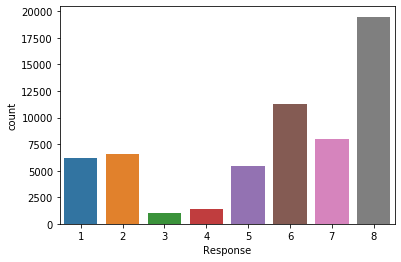

In [101]:
#Checking the distribution of Target Variable:
sns.countplot(data.Response)

From, the above figure we can infer that data is imbalanced and to make it Balanced we are used SMOTE Sampling Technique:

In [102]:
# SMOTE Sampling Technique:
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X,y)

Now, checking for the data distribution:

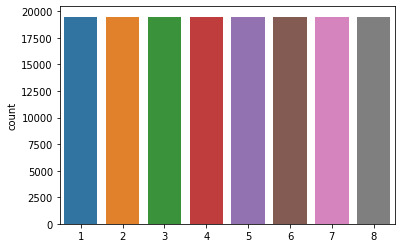

In [103]:
sns.countplot(y_sm)

From, the above figure we can infer that data is balanced.

### Modelling using balanced Data:

In [104]:
# Splitting the Balanced Data for finally modelling:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=2)

In [105]:
# Modelling and Evaluation for Base Model without SMOTE:


report= PrettyTable()
report.field_names=['Model name','Accuracy Score','Precision Score','Recall Score','F1_score','Cohen Kappa Score']


classifier=['LogisticRegression','KNN','DecisionTreeClassifier','RandomForestClassifier']
accuracy=[]
precision=[]
recall=[]
f1_score=[]
kappa=[]

for i in classifier:
    if i=='LogisticRegression':
        model1=LogisticRegression()
        model1.fit(X_sm_train,y_sm_train)
        log_pred=pd.DataFrame(model1.predict(X_sm_test))
        #Evaluation metrics
        report.add_row([i,
                    metrics.accuracy_score(y_sm_test,log_pred),
                    metrics.precision_score(y_sm_test,log_pred,average='weighted'),
                    metrics.recall_score(y_sm_test,log_pred,average='weighted'),
                    metrics.f1_score(y_sm_test,log_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_sm_test,log_pred)])
        
    elif i=='KNN': 
        model2=KNeighborsClassifier()
        model2.fit(X_sm_train,y_sm_train)
        knn_pred=model2.predict(X_sm_test)
        #Evaluation metrics
        report.add_row([i,
                    metrics.accuracy_score(y_sm_test,knn_pred),
                    metrics.precision_score(y_sm_test,knn_pred,average='weighted'),
                    metrics.recall_score(y_sm_test,knn_pred,average='weighted'),
                    metrics.f1_score(y_sm_test,knn_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_sm_test,log_pred)])
        
    elif i=='DecisionTreeClassifier':
        model3=DecisionTreeClassifier()
        model3.fit(X_sm_train,y_sm_train)
        dec_pred=model3.predict(X_sm_test)
        #Evaluation metrics
        report.add_row([i,
                    metrics.accuracy_score(y_sm_test,dec_pred),
                    metrics.precision_score(y_sm_test,dec_pred,average='weighted'),
                    metrics.recall_score(y_sm_test,dec_pred,average='weighted'),
                    metrics.f1_score(y_sm_test,dec_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_sm_test,log_pred)])
        
    elif i=='RandomForestClassifier':
        model4=RandomForestClassifier()
        model4.fit(X_sm_train,y_sm_train)
        random_pred=model4.predict(X_sm_test)
        #Evaluation metrics
        report.add_row([i,
                    metrics.accuracy_score(y_sm_test,random_pred),
                    metrics.precision_score(y_sm_test,random_pred,average='weighted'),
                    metrics.recall_score(y_sm_test,random_pred,average='weighted'),
                    metrics.f1_score(y_sm_test,random_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_sm_test,log_pred)])
print(report)


C:\Users\Sree Charan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sree Charan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Sree Charan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


+------------------------+---------------------+---------------------+---------------------+--------------------+--------------------+
|       Model name       |    Accuracy Score   |   Precision Score   |     Recall Score    |      F1_score      | Cohen Kappa Score  |
+------------------------+---------------------+---------------------+---------------------+--------------------+--------------------+
|   LogisticRegression   | 0.44357976653696496 | 0.42337325259880515 | 0.44357976653696496 | 0.4222464465672904 | 0.3640411192224021 |
|          KNN           |  0.6783469448839099 |  0.6594979454952857 |  0.6783469448839099 | 0.6476935537191046 | 0.3640411192224021 |
| DecisionTreeClassifier |  0.5325394449908069 |  0.5297386252073852 |  0.5325394449908069 | 0.5309696946139719 | 0.3640411192224021 |
| RandomForestClassifier |  0.6495275152862702 |  0.638296838267104  |  0.6495275152862702 | 0.641901433669651  | 0.3640411192224021 |
+------------------------+---------------------+-------

In [106]:
## Code to find the best hyper parameters for the KNN and DecisionTree and Random forest

from sklearn.model_selection import RandomizedSearchCV
## code to find the best model for the dataset


best_par= PrettyTable()
best_par.field_names=['Model name','Best Parameters','Best Score']


classifier=['KNN','DecisionTreeClassifier','RandomForestClassifier']


for i in classifier:
    if i=='KNN': 
        grid1={'n_neighbors': np.arange(1,50,2),'p': np.arange(1,50)}
        ran_search1=RandomizedSearchCV(model2,grid1,cv=5)
        ran_search1.fit(X_sm_train,y_sm_train)
        best_par.add_row([i,
                          ran_search1.best_params_,
                          ran_search1.best_score_])
        
    elif i=='DecisionTreeClassifier':
        grid2={'criterion':['gini','entropy'],'max_depth': np.arange(2,10),'max_leaf_nodes':np.arange(2,10),'min_samples_leaf':np.arange(2,10)}
        ran_search2=RandomizedSearchCV(model3,grid2,cv=5)
        ran_search2.fit(X_sm_train,y_sm_train)
        best_par.add_row([i,
                          ran_search2.best_params_,
                          ran_search2.best_score_])
        
    elif i=='RandomForestClassifier':
        grid3={'criterion':['gini','entropy'],'n_estimators':np.arange(1,100),'max_features':np.arange(1,10)}
        ran_search3=RandomizedSearchCV(model4,grid3,cv=3)
        ran_search3.fit(X_sm_train,y_sm_train)
        best_par.add_row([i,
                          ran_search3.best_params_,
                          ran_search3.best_score_])
        
print(best_par)


+------------------------+-----------------------------------------------------------------------------------+---------------------+
|       Model name       |                                  Best Parameters                                  |      Best Score     |
+------------------------+-----------------------------------------------------------------------------------+---------------------+
|          KNN           |                            {'p': 35, 'n_neighbors': 1}                            |   0.75369715406183  |
| DecisionTreeClassifier | {'min_samples_leaf': 5, 'max_leaf_nodes': 9, 'max_depth': 4, 'criterion': 'gini'} | 0.38190181238432075 |
| RandomForestClassifier |            {'n_estimators': 96, 'max_features': 1, 'criterion': 'gini'}           |  0.7231486741556561 |
+------------------------+-----------------------------------------------------------------------------------+---------------------+


In [109]:
# Since Random Forest Classifier outperformed, let's use it with parameter obtained and test it with unseen test data.
model4=RandomForestClassifier(n_estimators=96,max_features=4,criterion='gini')
model4.fit(X_sm_train,y_sm_train)
random_pred=model4.predict(X_sm_test)
    #Evaluation metrics
print("Accuracy Score:",metrics.accuracy_score(y_sm_test,random_pred))
print("Precision Score:",metrics.precision_score(y_sm_test,random_pred,average='weighted'))
print("Recall Score:",metrics.recall_score(y_sm_test,random_pred,average='weighted'))
print("F1 Score:",metrics.f1_score(y_sm_test,random_pred,average='weighted'),'\n')

print(metrics.confusion_matrix(y_sm_test,random_pred),'\n')

print(metrics.classification_report(y_sm_test,random_pred))

Accuracy Score: 0.7552486424081755
Precision Score: 0.7556995791445656
Recall Score: 0.7552486424081755
F1 Score: 0.7503830427623157 

[[3978  398   91  144  265  283  350  411]
 [ 407 3634   80  133  421  328  333  400]
 [   4   15 5603   52   44   36    9   31]
 [  12    3   24 5581    1   60   32  125]
 [ 177  239  101   77 4585  262  205  205]
 [ 397  355  113  291  348 2864  574  900]
 [ 178   81   42  158  124  422 3889  996]
 [  50   22    3   21   24  383  208 5192]] 

              precision    recall  f1-score   support

           1       0.76      0.67      0.72      5920
           2       0.77      0.63      0.69      5736
           3       0.93      0.97      0.95      5794
           4       0.86      0.96      0.91      5838
           5       0.79      0.78      0.79      5851
           6       0.62      0.49      0.55      5842
           7       0.69      0.66      0.68      5890
           8       0.63      0.88      0.73      5903

    accuracy                  